<a href="https://colab.research.google.com/github/chrisaMel/Machine-Learning/blob/Bankruptcy-Classifier/BankruptcyClassifier1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#1. Διαβάζει τα δεδομένα από το αρχείο excel.
from logging import exception
import pandas as pd

#Ανέβασμα αρχείου με δεδομένα
datafilelink = 'https://docs.google.com/spreadsheets/d/1xfNYsymJs0cuhcH7-Vi4hy0wB5uuujkf/export?format=xlsx'

#Επιτυχημένη λήψη του αρχείου
try :
  dataset = pd.read_excel(datafilelink)
  print('The file is properly read')
  print(dataset.head())

except FileNotFoundError:
 print('The file was not found, try chainging the name')

except Exception as e:
 print(" Some other error occured",{e})



The file is properly read
   365* ( Β.Υ / Κοστ.Πωλ )  Λειτ.Αποτ/Συν.Ενεργ. (ROA)  \
0              1014.128862                    0.011751   
1               561.974631                    0.099662   
2               826.919025                    0.009594   
3               493.176956                    0.196284   
4               100.421465                    0.179038   

   ΧΡΗΜ.ΔΑΠΑΝΕΣ / ΠΩΛΗΣΕΙΣ   ΠΡΑΓΜΑΤΙΚΗ ΡΕΥΣΤΟΤΗΤΑ :  (ΚΕ-ΑΠΟΘΕΜΑΤΑ) / Β.Υ  \
0                 0.038505                                        0.965479   
1                 0.015775                                        1.415467   
2                 0.093562                                        1.575034   
3                 0.000581                                        1.346780   
4                 0.000173                                        3.299687   

   (ΑΠΑΙΤ.*365) / ΠΩΛ.  Συν.Υποχρ/Συν.Ενεργ  Διάρκεια Παραμονής Αποθεμάτων  \
0           567.866550             0.532258                     545.195964   


In [ ]:
print("Types of data \n")
print(dataset.info())

In [ ]:
print("Description of the data \n")
print(dataset.describe())  # Στατιστικά περιγραφικά στοιχεία

In [ ]:
# Ομαδοποίηση δεδομένων ανά έτος και κατάσταση (1 = υγιής, 2 = χρεοκοπημένη)
grouped_data = dataset.groupby(['ΕΤΟΣ', 'ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)']).size().unstack()

# Αντικατάσταση των NaN με 0, αν υπάρχουν
grouped_data = grouped_data.fillna(0)

# Προεπισκόπηση των δεδομένων
print(grouped_data)


ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)     1   2
ΕΤΟΣ                                   
2006                           2748  52
2007                           2846  53
2008                           2731  99
2009                           2143  44


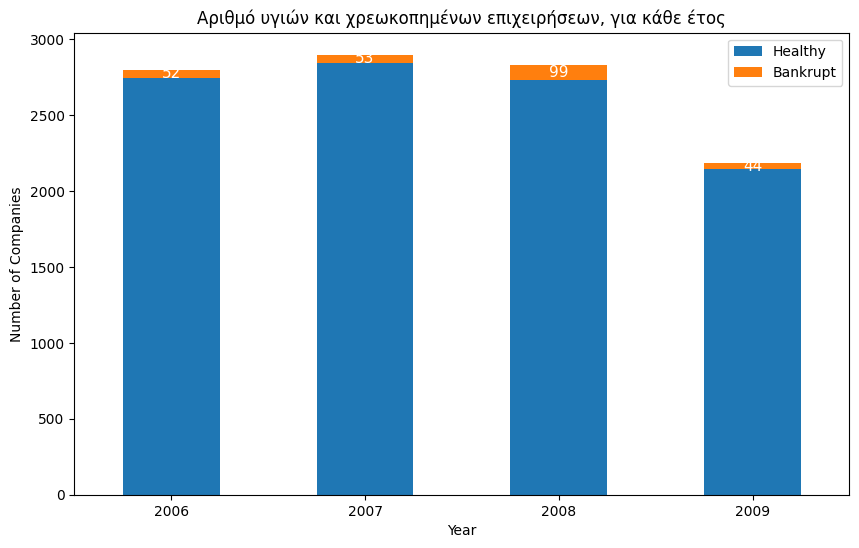

In [ ]:
# 2.a) Tυπώνει, σε γραφήματα τον αριθμό υγιών και χρεωκοπημένων επιχειρήσεων, για κάθε έτος
import matplotlib.pyplot as plt

# # Δημιουργία stacked bar plot
# grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# # Προσθήκη τίτλου και ετικετών
# plt.title('Stacked Bar Plot of Companies per Year')
# plt.xlabel('Year')
# plt.ylabel('Total Number of Companies')
# plt.legend(['Healthy', 'Bankrupt'])
# plt.xticks(rotation=45)

# # Εμφάνιση του γραφήματος
# plt.show()


# Δημιουργία stacked bar plot για τον Αριθμό υγιών και χρεωκοπημένων επιχειρήσεων, για κάθε έτος
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Προσθήκη ετικετών για τις bankrupt επιχειρήσεις (πάνω από το σωστό σημείο κάθε μπάρας)
for i, (healthy, bankrupt) in enumerate(zip(grouped_data[1], grouped_data[2])):
    # Ετικέτα για bankrupt (πάνω από το stacked μέρος)
    ax.text(i, healthy + bankrupt / 2, str(int(bankrupt)), ha='center', va='center', color='white', fontsize=11)

# Προσθήκη τίτλου και ετικετών αξόνων
plt.title('Αριθμό υγιών και χρεωκοπημένων επιχειρήσεων, για κάθε έτος')
plt.xlabel('Year')
plt.ylabel('Number of Companies')
plt.legend(['Healthy', 'Bankrupt'])
plt.xticks(rotation=360)

# Εμφάνιση του γραφήματος
plt.show()


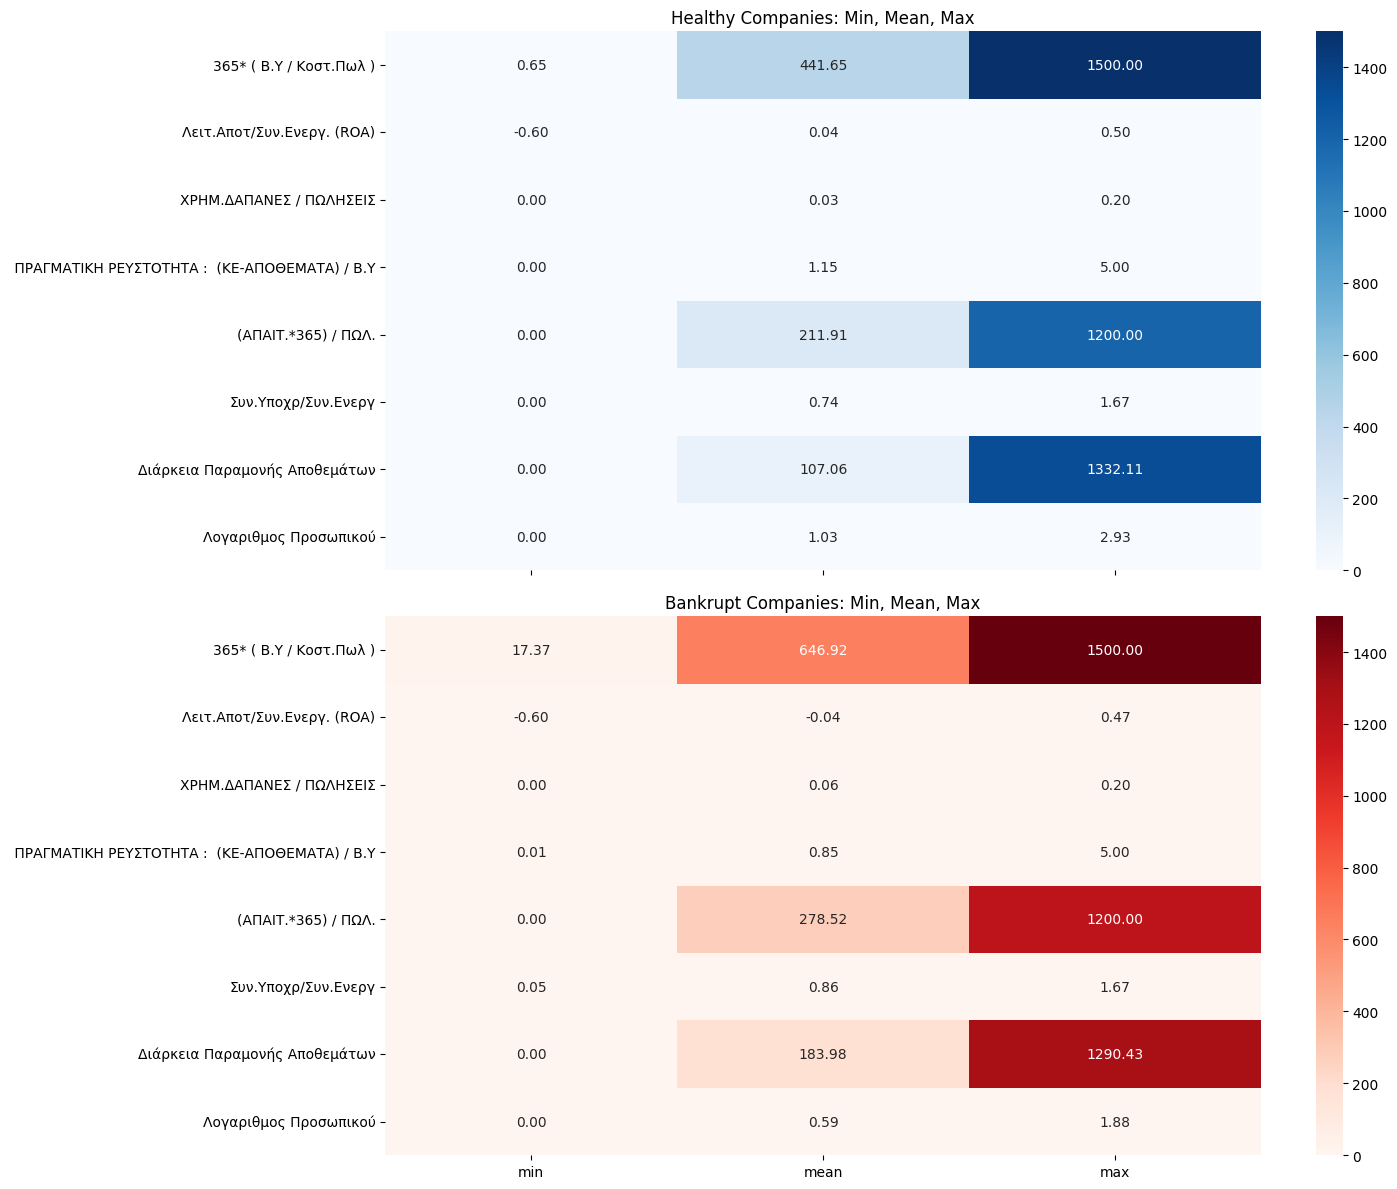

In [ ]:

# 2.b) Tυπώνει, σε γραφήματα τα min, max, average τιμή για κάθε δείκτη

import seaborn as sns


# Διαχωρισμός των δεδομένων
healthy = dataset[dataset['ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)'] == 1]
bankrupt = dataset[dataset['ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)'] == 2]

# Λίστα με στήλες για ανάλυση
columns_to_analyze = [
    '365* ( Β.Υ / Κοστ.Πωλ )',
    'Λειτ.Αποτ/Συν.Ενεργ. (ROA)',
    'ΧΡΗΜ.ΔΑΠΑΝΕΣ / ΠΩΛΗΣΕΙΣ',
    ' ΠΡΑΓΜΑΤΙΚΗ ΡΕΥΣΤΟΤΗΤΑ :  (ΚΕ-ΑΠΟΘΕΜΑΤΑ) / Β.Υ',
    '(ΑΠΑΙΤ.*365) / ΠΩΛ.',
    'Συν.Υποχρ/Συν.Ενεργ',
    'Διάρκεια Παραμονής Αποθεμάτων',
    'Λογαριθμος Προσωπικού'
]

# Dictionary για συντομευμένα labels
short_labels = {
    '365* ( Β.Υ / Κοστ.Πωλ )': 'Inventory Turnover',
    'Λειτ.Αποτ/Συν.Ενεργ. (ROA)': 'ROA',
    'ΧΡΗΜ.ΔΑΠΑΝΕΣ / ΠΩΛΗΣΕΙΣ': 'Fin Exp/Sales',
    ' ΠΡΑΓΜΑΤΙΚΗ ΡΕΥΣΤΟΤΗΤΑ :  (ΚΕ-ΑΠΟΘΕΜΑΤΑ) / Β.Υ': 'Real Liquidity',
    '(ΑΠΑΙΤ.*365) / ΠΩΛ.': 'Receiv Turn',
    'Συν.Υποχρ/Συν.Ενεργ': 'Liab/Assets',
    'Διάρκεια Παραμονής Αποθεμάτων': 'Inv Days',
    'Λογαριθμος Προσωπικού': 'Log Employees'
}

# Υπολογισμός στατιστικών
healthy_stats = healthy[columns_to_analyze].describe().loc[['min', 'mean','max']]
bankrupt_stats = bankrupt[columns_to_analyze].describe().loc[['min', 'mean','max']]

# Μετονομασία των σειρών
healthy_stats = healthy_stats.rename(index=short_labels)
bankrupt_stats = bankrupt_stats.rename(index=short_labels)

# Δημιουργία του subplot
fig, axs = plt.subplots(2, 1, figsize=(15, 12), sharex=True)

# Υγιείς εταιρείες heatmap
sns.heatmap(healthy_stats.T, annot=True, fmt=".2f", cmap='Blues', ax=axs[0])
axs[0].set_title('Healthy Companies: Min, Mean, Max')
axs[0].tick_params(axis='x')

# Πτωχευμένες εταιρείες heatmap
sns.heatmap(bankrupt_stats.T, annot=True, fmt=".2f", cmap='Reds', ax=axs[1])
axs[1].set_title('Bankrupt Companies: Min, Mean, Max')
axs[1].tick_params(axis='x')

plt.tight_layout()
plt.show()


In [ ]:
#Εναλλακτηκό figure 2
# from sklearn.preprocessing import StandardScaler
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Διαχωρισμός των δεδομένων
# healthy = dataset[dataset['ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)'] == 1]
# bankrupt = dataset[dataset['ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)'] == 2]

# # Λίστα με στήλες για ανάλυση
# columns_to_analyze = [
#     '365* ( Β.Υ / Κοστ.Πωλ )',
#     'Λειτ.Αποτ/Συν.Ενεργ. (ROA)',
#     'ΧΡΗΜ.ΔΑΠΑΝΕΣ / ΠΩΛΗΣΕΙΣ',
#     ' ΠΡΑΓΜΑΤΙΚΗ ΡΕΥΣΤΟΤΗΤΑ :  (ΚΕ-ΑΠΟΘΕΜΑΤΑ) / Β.Υ',
#     '(ΑΠΑΙΤ.*365) / ΠΩΛ.',
#     'Συν.Υποχρ/Συν.Ενεργ',
#     'Διάρκεια Παραμονής Αποθεμάτων',
#     'Λογαριθμος Προσωπικού'
# ]

# # Τυποποίηση (Z-Score) για υγιείς εταιρείες
# scaler = StandardScaler()
# healthy_standardized = pd.DataFrame(
#     scaler.fit_transform(healthy[columns_to_analyze]),
#     columns=columns_to_analyze
# )

# # Τυποποίηση (Z-Score) για πτωχευμένες εταιρείες
# bankrupt_standardized = pd.DataFrame(
#     scaler.fit_transform(bankrupt[columns_to_analyze]),
#     columns=columns_to_analyze
# )

# # Dictionary για συντομευμένα labels
# short_labels = {
#     '365* ( Β.Υ / Κοστ.Πωλ )': 'Inventory Turnover',
#     'Λειτ.Αποτ/Συν.Ενεργ. (ROA)': 'ROA',
#     'ΧΡΗΜ.ΔΑΠΑΝΕΣ / ΠΩΛΗΣΕΙΣ': 'Fin Exp/Sales',
#     ' ΠΡΑΓΜΑΤΙΚΗ ΡΕΥΣΤΟΤΗΤΑ :  (ΚΕ-ΑΠΟΘΕΜΑΤΑ) / Β.Υ': 'Real Liquidity',
#     '(ΑΠΑΙΤ.*365) / ΠΩΛ.': 'Receiv Turn',
#     'Συν.Υποχρ/Συν.Ενεργ': 'Liab/Assets',
#     'Διάρκεια Παραμονής Αποθεμάτων': 'Inv Days',
#     'Λογαριθμος Προσωπικού': 'Log Employees'
# }

# # Υπολογισμός στατιστικών
# healthy_stats = healthy_standardized.describe().loc[['min', 'mean', 'max']]
# bankrupt_stats = bankrupt_standardized.describe().loc[['min', 'mean', 'max']]

# # Μετονομασία των σειρών
# healthy_stats = healthy_stats.rename(index=short_labels)
# bankrupt_stats = bankrupt_stats.rename(index=short_labels)

# # Δημιουργία του subplot
# fig, axs = plt.subplots(2, 1, figsize=(15, 12), sharex=True)

# # Υγιείς εταιρείες heatmap
# sns.heatmap(healthy_stats.T, annot=True, fmt=".2f", cmap='Blues', ax=axs[0])
# axs[0].set_title('Healthy Companies: Min, Mean, Max (Normalized)')
# axs[0].tick_params(axis='x')

# # Πτωχευμένες εταιρείες heatmap
# sns.heatmap(bankrupt_stats.T, annot=True, fmt=".2f", cmap='Reds', ax=axs[1])
# axs[1].set_title('Bankrupt Companies: Min, Mean, Max (Normalized)')
# axs[1].tick_params(axis='x')

# plt.tight_layout()
# plt.show()


In [ ]:
# 3. Έλεγχος για τυχόν ελλιπείς εγγραφές
if dataset.isnull().values.any():
    print("Υπάρχουν ελλιπείς εγγραφές (NaN) στο dataset.")
    print(dataset.isnull().sum())  # Εμφάνιση του αριθμού των NaN ανά στήλη
else:
    print("Δεν υπάρχουν ελλιπείς εγγραφές (NaN) στο dataset.")

Δεν υπάρχουν ελλιπείς εγγραφές (NaN) στο dataset.


In [2]:
# 4. Κανονικοποίηση δεδομένων στο διάστημα [0,1]
#Κανονικοποίηση μόνο των τιμών που δεν είναι εξάρχησ στο διάστημα αυτό και εκτός το δείκτη Ενδειξη Ασυνέπειας

from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = [
    '365* ( Β.Υ / Κοστ.Πωλ )',
    'Λειτ.Αποτ/Συν.Ενεργ. (ROA)',
    'ΧΡΗΜ.ΔΑΠΑΝΕΣ / ΠΩΛΗΣΕΙΣ',
    ' ΠΡΑΓΜΑΤΙΚΗ ΡΕΥΣΤΟΤΗΤΑ :  (ΚΕ-ΑΠΟΘΕΜΑΤΑ) / Β.Υ',
    '(ΑΠΑΙΤ.*365) / ΠΩΛ.',
    'Συν.Υποχρ/Συν.Ενεργ',
    'Διάρκεια Παραμονής Αποθεμάτων',
    'Λογαριθμος Προσωπικού',
    'ΕΤΟΣ'
]

# Δημιουργία του MinMaxScaler
scaler = MinMaxScaler()

# Εφαρμογή κανονικοποίησης
dataset[columns_to_normalize] = scaler.fit_transform(dataset[columns_to_normalize])

print("Τα δεδομένα έχουν κανονικοποιηθεί στο διάστημα [0,1].")
print(dataset.describe())

Τα δεδομένα έχουν κανονικοποιηθεί στο διάστημα [0,1].
       365* ( Β.Υ / Κοστ.Πωλ )  Λειτ.Αποτ/Συν.Ενεργ. (ROA)  \
count             10716.000000                10716.000000   
mean                  0.297293                    0.579531   
std                   0.257869                    0.115030   
min                   0.000000                    0.000000   
25%                   0.115054                    0.549574   
50%                   0.216568                    0.571106   
75%                   0.380265                    0.618654   
max                   1.000000                    1.000000   

       ΧΡΗΜ.ΔΑΠΑΝΕΣ / ΠΩΛΗΣΕΙΣ  \
count             10716.000000   
mean                  0.144647   
std                   0.190035   
min                   0.000000   
25%                   0.010050   
50%                   0.075716   
75%                   0.207091   
max                   1.000000   

        ΠΡΑΓΜΑΤΙΚΗ ΡΕΥΣΤΟΤΗΤΑ :  (ΚΕ-ΑΠΟΘΕΜΑΤΑ) / Β.Υ  (ΑΠΑΙΤ.*365) / ΠΩΛ.  \
co

In [3]:
# 5.Kάνει χρήση του Stratified kfold ώστε να δημιουργεί 4 folds
from sklearn.model_selection import StratifiedKFold

# Δημιουργία του Stratified K-Fold αντικειμένου
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

# Στόχοι (target variable)
X = dataset.drop(columns=['ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)'])  # Όλα τα χαρακτηριστικά εκτόσ label
y = dataset['ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)']  # Ετικέτες (1: Υγιής, 2: Χρεοκοπημένη)

# Δημιουργία των folds
fold = 1
for train_index, test_index in skf.split(X, y):
    print(f"Fold {fold}:")
    print(f"Train Indices: {train_index[:10]}... Total: {len(train_index)}")  # Εμφάνιση των πρώτων 10 δεικτών
    print(f"Test Indices: {test_index[:10]}... Total: {len(test_index)}")

    # Διαχωρισμός δεδομένων
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    print(f"Train Labels Distribution: \n{y_train.value_counts(normalize=True)}")
    print(f"Test Labels Distribution: \n{y_test.value_counts(normalize=True)}")

    fold += 1


Fold 1:
Train Indices: [ 0  1  3  4  5  6  8  9 10 11]... Total: 8037
Test Indices: [ 2  7 13 21 25 36 37 40 41 43]... Total: 2679
Train Labels Distribution: 
ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)
1    0.976857
2    0.023143
Name: proportion, dtype: float64
Test Labels Distribution: 
ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)
1    0.976857
2    0.023143
Name: proportion, dtype: float64
Fold 2:
Train Indices: [ 0  1  2  3  5  6  7  8 10 11]... Total: 8037
Test Indices: [ 4  9 14 15 16 20 32 33 35 39]... Total: 2679
Train Labels Distribution: 
ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)
1    0.976857
2    0.023143
Name: proportion, dtype: float64
Test Labels Distribution: 
ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)
1    0.976857
2    0.023143
Name: proportion, dtype: float64
Fold 3:
Train Indices: [ 2  4  5  7  8  9 12 13 14 15]... Total: 8037
Test Indices: [ 0  1  3  6 10 11 18 22 27 29]... Total: 2679
Train Labels Distribution: 
ΕΝΔΕΙΞΗ ΑΣΥΝΕΠΕΙΑΣ (=2) (ν+1)
1    0.976857
2    0.023143
Name: proportion, dtype: float64
Test Labels Di

In [19]:
#6.a πόσες χρεωκοπημένες και πόσες υγιείς εταιρείες υπάρχουν στο training set
#6.b Και πόσες στο test set

fold = 1

for train_i, test_i in skf.split(X,y) :

   y_train, y_test = y.iloc[train_i], y.iloc[test_i]

   count_b_in_train = (y_train == 2).sum()
   count_not_b_in_train = (y_train == 1).sum()

   count_b_in_test = (y_test == 2).sum()
   count_not_b_in_test = (y_test == 1).sum()

   print(f"Fold {fold}:")
   print(f"Train Set: {count_b_in_train} bankrupt companies, {count_not_b_in_train} NOT bankrupt companies")
   print(f"Test Set: {count_b_in_test} bankrupt companies, {count_not_b_in_test} NOT bankrupt companies\n")

   fold+=1







Fold 1:
Train Set: 186 bankrupt companies, 7851 NOT bankrupt companies
Test Set: 62 bankrupt companies, 2617 NOT bankrupt companies

Fold 2:
Train Set: 186 bankrupt companies, 7851 NOT bankrupt companies
Test Set: 62 bankrupt companies, 2617 NOT bankrupt companies

Fold 3:
Train Set: 186 bankrupt companies, 7851 NOT bankrupt companies
Test Set: 62 bankrupt companies, 2617 NOT bankrupt companies

Fold 4:
Train Set: 186 bankrupt companies, 7851 NOT bankrupt companies
Test Set: 62 bankrupt companies, 2617 NOT bankrupt companies



In [35]:
from sklearn.utils import resample

fold = 1
resampled_data = []  # To store the new resampled dataset for all folds

# Loop through each fold
for train_index, test_index in skf.split(X, y):
    # Split training and testing data
    X_train, y_train = X.iloc[train_index], y.iloc[train_index]
    X_test, y_test = X.iloc[test_index], y.iloc[test_index]

    # Resample training data to enforce 3:1 ratio
    X_train_healthy = X_train[y_train == 1]
    X_train_bankrupt = X_train[y_train == 2]

    if len(X_train_healthy) > 3 * len(X_train_bankrupt):
        X_train_healthy_resampled = resample(
            X_train_healthy,
            replace=False,
            n_samples=3 * len(X_train_bankrupt),
            random_state=42
        )
        # Combine resampled healthy and bankrupt data
        X_train_resampled = pd.concat([X_train_healthy_resampled, X_train_bankrupt])
        y_train_resampled = pd.concat([
            pd.Series([1] * len(X_train_healthy_resampled), index=X_train_healthy_resampled.index),
            pd.Series([2] * len(X_train_bankrupt), index=X_train_bankrupt.index)
        ])
    else:
        X_train_resampled = X_train
        y_train_resampled = y_train

    # Shuffle the resampled data
    X_train_resampled = X_train_resampled.sample(frac=1, random_state=42)
    y_train_resampled = y_train_resampled.loc[X_train_resampled.index]

    # Append resampled data to global dataset for later use
    resampled_data.append((X_train_resampled, y_train_resampled, X_test, y_test))

    # Print resampled ratios
    print(f"Fold {fold}:")
    print(f"Train Set: {len(y_train_resampled[y_train_resampled == 1])} healthy companies, "
          f"{len(y_train_resampled[y_train_resampled == 2])} bankrupt companies")
    print(f"Test Set: {len(y_test[y_test == 1])} healthy companies, {len(y_test[y_test == 2])} bankrupt companies\n")
    fold += 1


Fold 1:
Train Set: 558 healthy companies, 186 bankrupt companies
Test Set: 2617 healthy companies, 62 bankrupt companies

Fold 2:
Train Set: 558 healthy companies, 186 bankrupt companies
Test Set: 2617 healthy companies, 62 bankrupt companies

Fold 3:
Train Set: 558 healthy companies, 186 bankrupt companies
Test Set: 2617 healthy companies, 62 bankrupt companies

Fold 4:
Train Set: 558 healthy companies, 186 bankrupt companies
Test Set: 2617 healthy companies, 62 bankrupt companies



In [41]:
#Εισαγωγή απαραίτητων στοιχίων για κάθε μοντέλο

import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import csv as csv
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier



In [11]:
#Δημιουργία του χώρου για την αποθήκευση των αρχείων στο drive

#create a folder to store results

# Specify the Drive Path
drive_path = '/content/drive/My Drive/ExperimentalResults/BankruptcyClassifier'

# Check if the folder exists, and create it if necessary
if not os.path.exists(drive_path):
    os.makedirs(drive_path)

# Check if the folder exists, and create it if necessary
figure_folder_path = os.path.join(drive_path, 'Figures')  # You can change 'Figures' to your desired folder name
if not os.path.exists(figure_folder_path):
    os.makedirs(figure_folder_path)




In [12]:
# Βοηθητική συναρτηση ν1 "Υπολογισμός Μετρικών"
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
)

def calculate_metrics(y_true, y_pred, y_proba=None):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    metrics = {
        "TP": tp,
        "TN": tn,
        "FP": fp,
        "FN": fn,
        "Accuracy": round(accuracy_score(y_true, y_pred), 2),
        "Precision": round(precision_score(y_true, y_pred, zero_division=0), 2),
        "Recall": round(recall_score(y_true, y_pred, zero_division=0), 2),
        "F1 Score": round(f1_score(y_true, y_pred), 2),
        "ROC-AUC": round(roc_auc_score(y_true, y_proba), 2) if y_proba is not None else None
    }
    return metrics


In [13]:
# Βοηθητική  για Confusion Matrix με πιο ωραία plots
def funcy_cf_plot(cf_matrix, class_names, fullMatrixName, directoryToSave):
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)

    ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
    ax.set_xlabel('Predicted company status')
    ax.set_ylabel('Actual company status')
    ax.xaxis.set_ticklabels(class_names)
    ax.yaxis.set_ticklabels(class_names)

    figure_path = os.path.join(directoryToSave, fullMatrixName + ".png")
    plt.savefig(figure_path)
    plt.show()



In [14]:

# Λίστα για αποθήκευση δεδομένων
csv_data = []

# Διαδρομή για αποθήκευση εικόνων
figure_folder_path = "figures"
os.makedirs(figure_folder_path, exist_ok=True)


In [38]:
# Συνάρτηση για εκπαίδευση και αξιολόγηση μοντέλων

def one_model_sim_function(modelName, clf, X_train, y_train, X_test, y_test, figure_folder_path, balancingRatio):
    print(f'. Working with classifier {modelName}...')

    # Train the model
    start_time = time.time()
    clf.fit(X_train, y_train)
    training_time = time.time() - start_time
    print(f'. Finished training in {training_time:.4f} seconds.')

    # Predictions
    predicted_train = clf.predict(X_train)
    predicted_test = clf.predict(X_test)

    # Probabilities for AUC-ROC
    y_train_proba = clf.predict_proba(X_train)[:, 1] if hasattr(clf, "predict_proba") else None
    y_test_proba = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else None

    # Metrics
    train_metrics = calculate_metrics(y_train, predicted_train, y_train_proba)
    test_metrics = calculate_metrics(y_test, predicted_test, y_test_proba)

    print(f"Train Metrics for {modelName}:")
    for metric, value in train_metrics.items():
        print(f"{metric}: {value}")
    print(f"Test Metrics for {modelName}:")
    for metric, value in test_metrics.items():
        print(f"{metric}: {value}")

    # Confusion Matrices
    cf_matrix_train = confusion_matrix(y_train, predicted_train)
    cf_matrix_test = confusion_matrix(y_test, predicted_test)

    # Save confusion matrices
    funcy_cf_plot(cf_matrix_train, ['Healthy', 'Bankrupt'], f"{modelName}_Train_{balancingRatio}", figure_folder_path)
    funcy_cf_plot(cf_matrix_test, ['Healthy', 'Bankrupt'], f"{modelName}_Test_{balancingRatio}", figure_folder_path)

    # Append results to csv_data
    csv_data.append([
        modelName, "Train", balancingRatio,
        len(y_train), sum(y_train == 2),
        cf_matrix_train[1, 1], cf_matrix_train[0, 1], cf_matrix_train[0, 0], cf_matrix_train[1, 0],
        train_metrics["ROC-AUC"]
    ])
    csv_data.append([
        modelName, "Test", balancingRatio,
        len(y_test), sum(y_test == 2),
        cf_matrix_test[1, 1], cf_matrix_test[0, 1], cf_matrix_test[0, 0], cf_matrix_test[1, 0],
        test_metrics["ROC-AUC"]
    ])
    print('. Finished appending results to csv_data.')


Currently in fold 1...
. Working with classifier SVM...
. Finished training in 0.1584 seconds.
Train Metrics for SVM:
TP: 157
TN: 452
FP: 106
FN: 29
Accuracy: 0.82
Precision: 0.94
Recall: 0.81
F1 Score: 0.87
ROC-AUC: 0.91
Test Metrics for SVM:
TP: 50
TN: 2010
FP: 607
FN: 12
Accuracy: 0.77
Precision: 0.99
Recall: 0.77
F1 Score: 0.87
ROC-AUC: 0.85


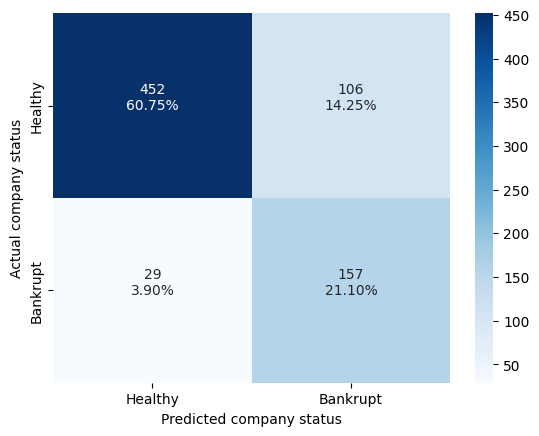

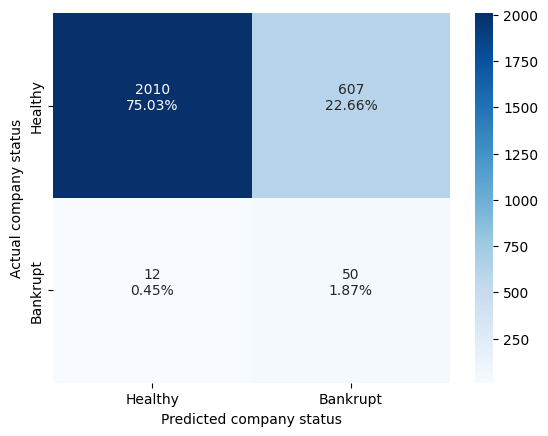

. Finished appending results to csv_data.
. Working with classifier Ctree...
. Finished training in 0.0124 seconds.
Train Metrics for Ctree:
TP: 186
TN: 558
FP: 0
FN: 0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC: 1.0
Test Metrics for Ctree:
TP: 37
TN: 2117
FP: 500
FN: 25
Accuracy: 0.8
Precision: 0.99
Recall: 0.81
F1 Score: 0.89
ROC-AUC: 0.7


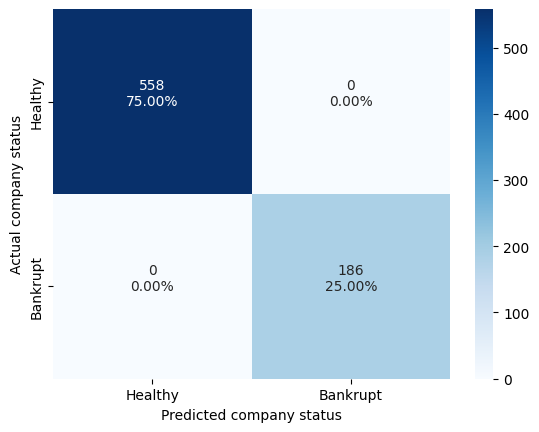

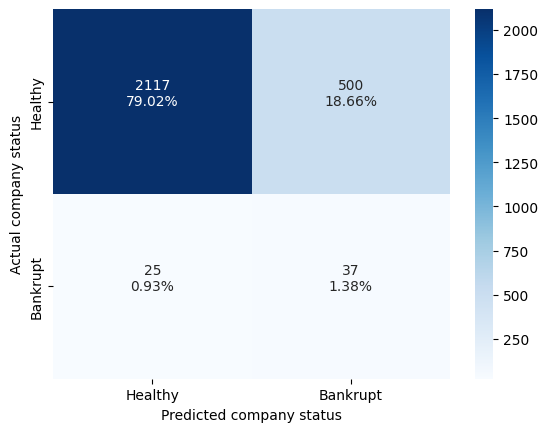

. Finished appending results to csv_data.
. Working with classifier LDA...
. Finished training in 0.0037 seconds.
Train Metrics for LDA:
TP: 80
TN: 523
FP: 35
FN: 106
Accuracy: 0.81
Precision: 0.83
Recall: 0.94
F1 Score: 0.88
ROC-AUC: 0.87
Test Metrics for LDA:
TP: 31
TN: 2400
FP: 217
FN: 31
Accuracy: 0.91
Precision: 0.99
Recall: 0.92
F1 Score: 0.95
ROC-AUC: 0.83


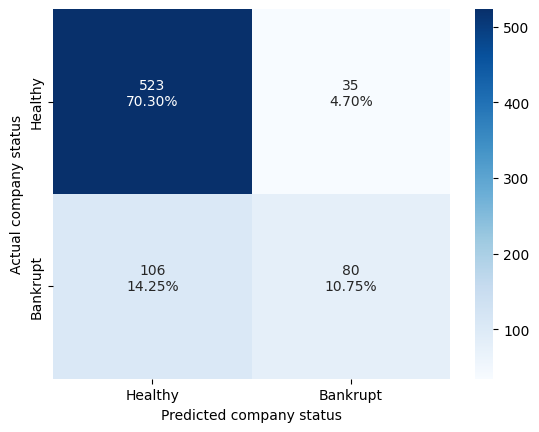

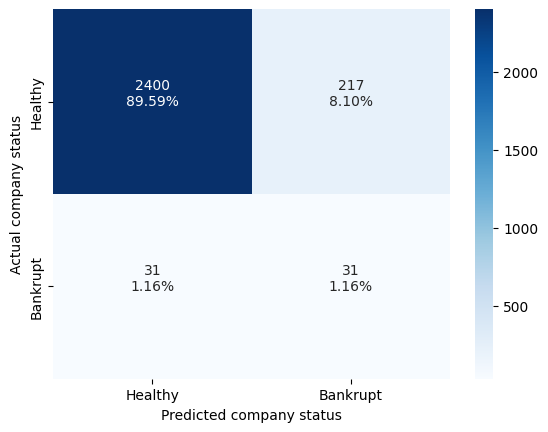

. Finished appending results to csv_data.
. Working with classifier LR...
. Finished training in 0.0087 seconds.
Train Metrics for LR:
TP: 148
TN: 442
FP: 116
FN: 38
Accuracy: 0.79
Precision: 0.92
Recall: 0.79
F1 Score: 0.85
ROC-AUC: 0.87
Test Metrics for LR:
TP: 48
TN: 2009
FP: 608
FN: 14
Accuracy: 0.77
Precision: 0.99
Recall: 0.77
F1 Score: 0.87
ROC-AUC: 0.84


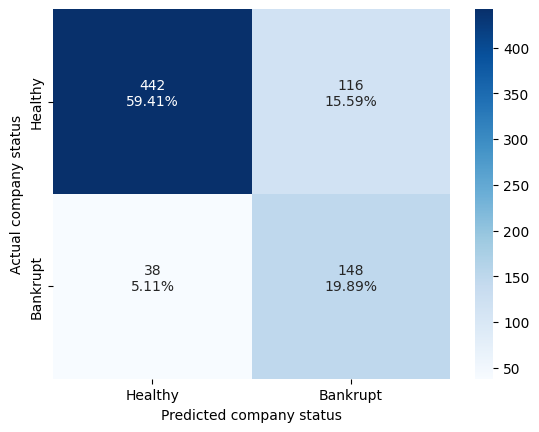

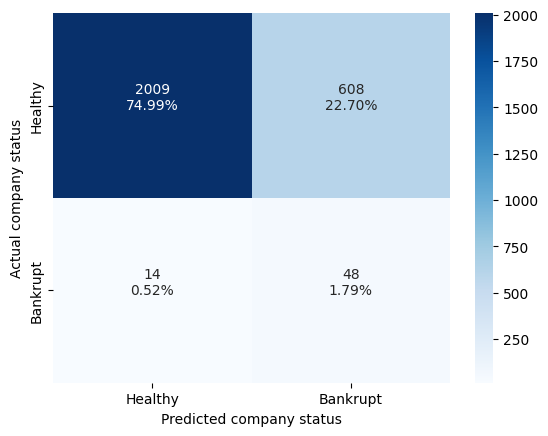

. Finished appending results to csv_data.
. Working with classifier RF...
. Finished training in 0.2930 seconds.
Train Metrics for RF:
TP: 186
TN: 558
FP: 0
FN: 0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC: 1.0
Test Metrics for RF:
TP: 30
TN: 2433
FP: 184
FN: 32
Accuracy: 0.92
Precision: 0.99
Recall: 0.93
F1 Score: 0.96
ROC-AUC: 0.86


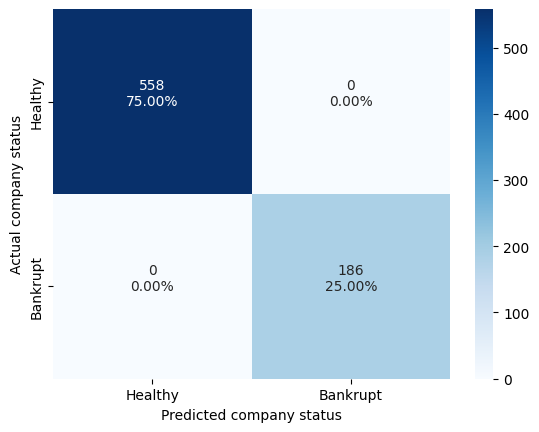

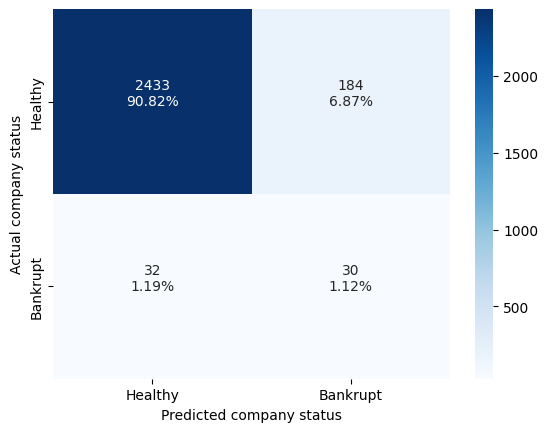

. Finished appending results to csv_data.
. Working with classifier kNN...
. Finished training in 0.0041 seconds.
Train Metrics for kNN:
TP: 108
TN: 521
FP: 37
FN: 78
Accuracy: 0.85
Precision: 0.87
Recall: 0.93
F1 Score: 0.9
ROC-AUC: 0.92
Test Metrics for kNN:
TP: 32
TN: 2319
FP: 298
FN: 30
Accuracy: 0.88
Precision: 0.99
Recall: 0.89
F1 Score: 0.93
ROC-AUC: 0.79


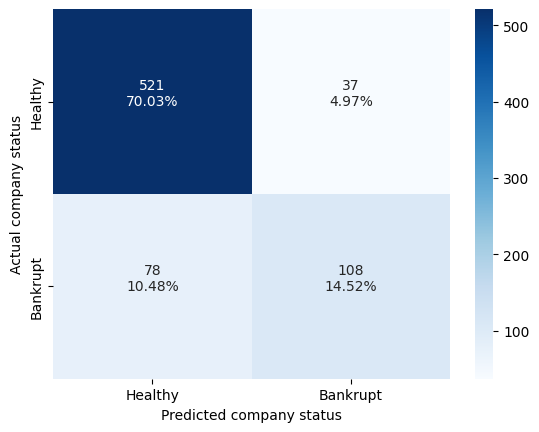

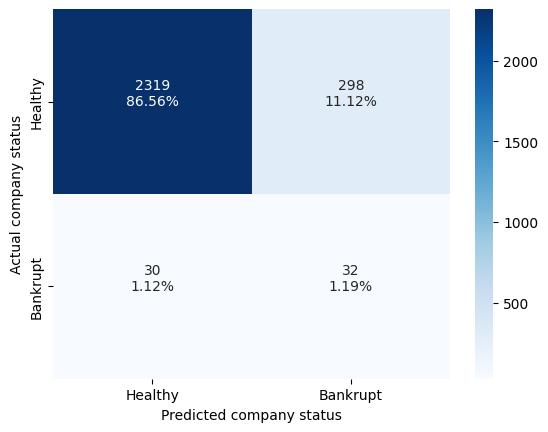

. Finished appending results to csv_data.
. Working with classifier NB...
. Finished training in 0.0090 seconds.
Train Metrics for NB:
TP: 86
TN: 504
FP: 54
FN: 100
Accuracy: 0.79
Precision: 0.83
Recall: 0.9
F1 Score: 0.87
ROC-AUC: 0.85
Test Metrics for NB:
TP: 31
TN: 2315
FP: 302
FN: 31
Accuracy: 0.88
Precision: 0.99
Recall: 0.88
F1 Score: 0.93
ROC-AUC: 0.82


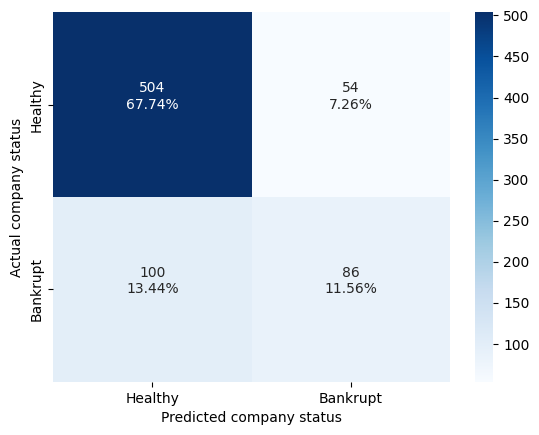

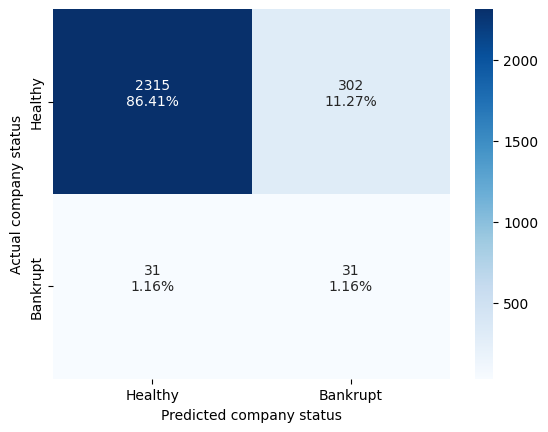

. Finished appending results to csv_data.
. Working with classifier MLP...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


. Finished training in 0.8812 seconds.
Train Metrics for MLP:
TP: 112
TN: 526
FP: 32
FN: 74
Accuracy: 0.86
Precision: 0.88
Recall: 0.94
F1 Score: 0.91
ROC-AUC: 0.9
Test Metrics for MLP:
TP: 38
TN: 2355
FP: 262
FN: 24
Accuracy: 0.89
Precision: 0.99
Recall: 0.9
F1 Score: 0.94
ROC-AUC: 0.85


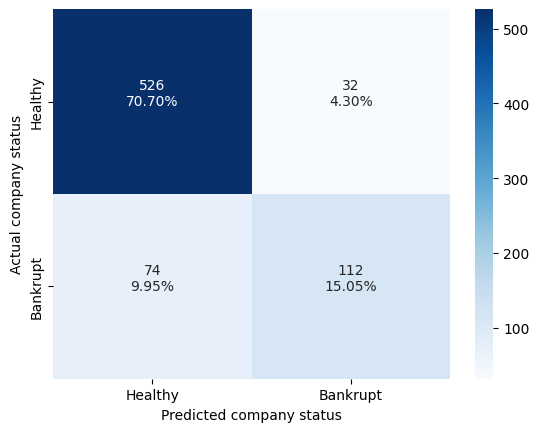

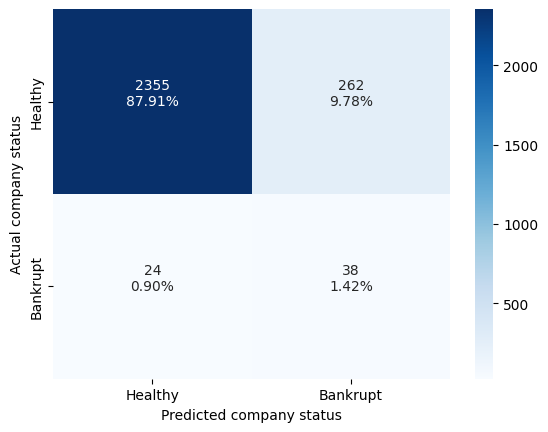

. Finished appending results to csv_data.
Currently in fold 2...
. Working with classifier SVM...
. Finished training in 0.1106 seconds.
Train Metrics for SVM:
TP: 153
TN: 434
FP: 124
FN: 33
Accuracy: 0.79
Precision: 0.93
Recall: 0.78
F1 Score: 0.85
ROC-AUC: 0.88
Test Metrics for SVM:
TP: 51
TN: 1959
FP: 658
FN: 11
Accuracy: 0.75
Precision: 0.99
Recall: 0.75
F1 Score: 0.85
ROC-AUC: 0.86


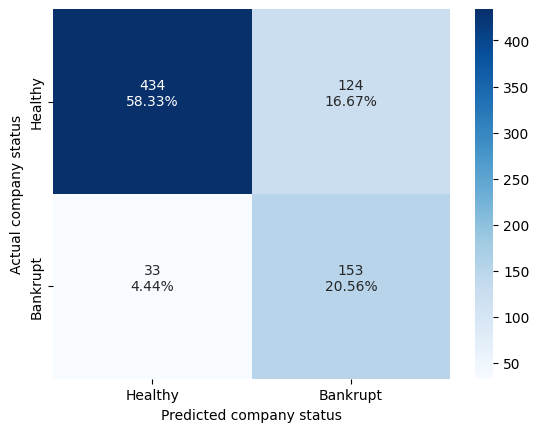

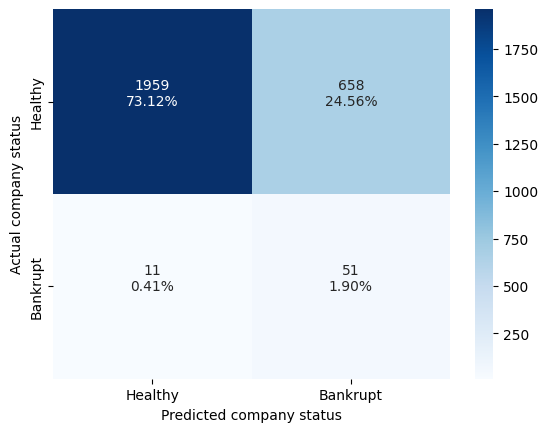

. Finished appending results to csv_data.
. Working with classifier Ctree...
. Finished training in 0.0105 seconds.
Train Metrics for Ctree:
TP: 186
TN: 558
FP: 0
FN: 0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC: 1.0
Test Metrics for Ctree:
TP: 25
TN: 2136
FP: 481
FN: 37
Accuracy: 0.81
Precision: 0.98
Recall: 0.82
F1 Score: 0.89
ROC-AUC: 0.61


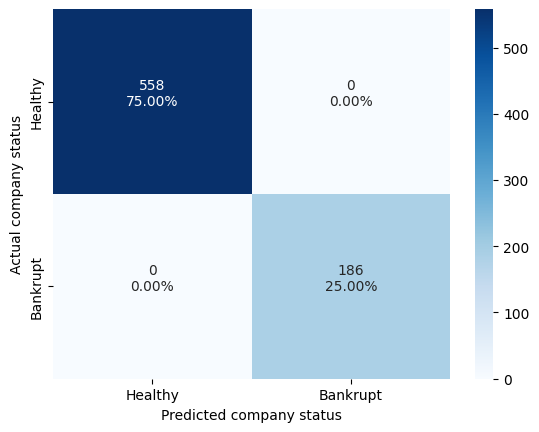

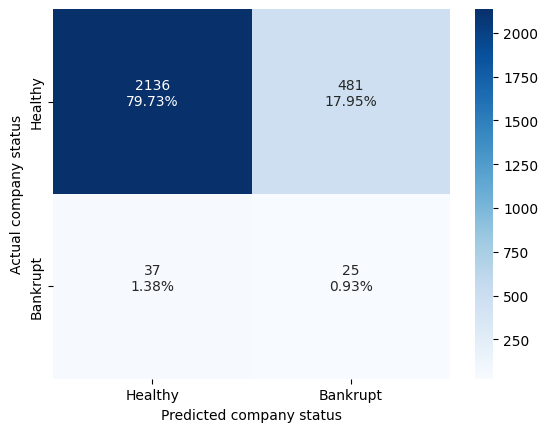

. Finished appending results to csv_data.
. Working with classifier LDA...
. Finished training in 0.0048 seconds.
Train Metrics for LDA:
TP: 69
TN: 522
FP: 36
FN: 117
Accuracy: 0.79
Precision: 0.82
Recall: 0.94
F1 Score: 0.87
ROC-AUC: 0.83
Test Metrics for LDA:
TP: 30
TN: 2440
FP: 177
FN: 32
Accuracy: 0.92
Precision: 0.99
Recall: 0.93
F1 Score: 0.96
ROC-AUC: 0.87


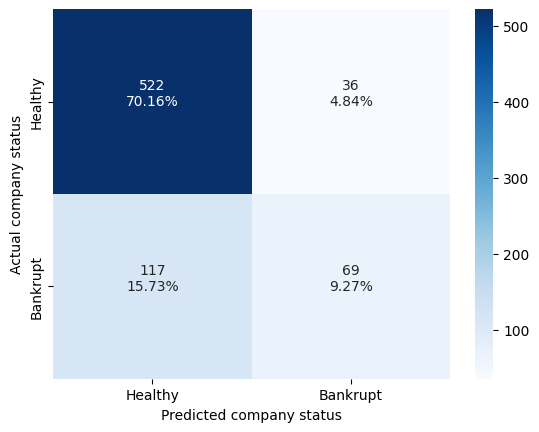

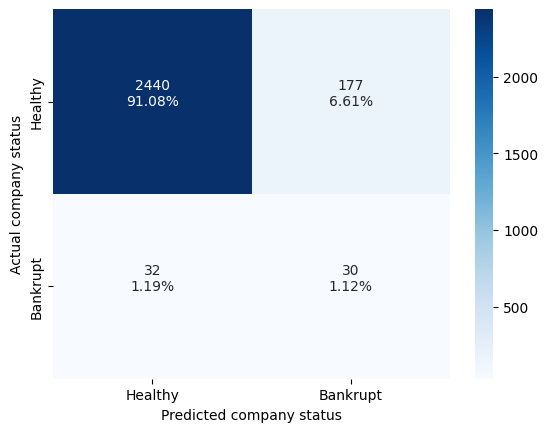

. Finished appending results to csv_data.
. Working with classifier LR...
. Finished training in 0.0100 seconds.
Train Metrics for LR:
TP: 141
TN: 412
FP: 146
FN: 45
Accuracy: 0.74
Precision: 0.9
Recall: 0.74
F1 Score: 0.81
ROC-AUC: 0.83
Test Metrics for LR:
TP: 54
TN: 1954
FP: 663
FN: 8
Accuracy: 0.75
Precision: 1.0
Recall: 0.75
F1 Score: 0.85
ROC-AUC: 0.86


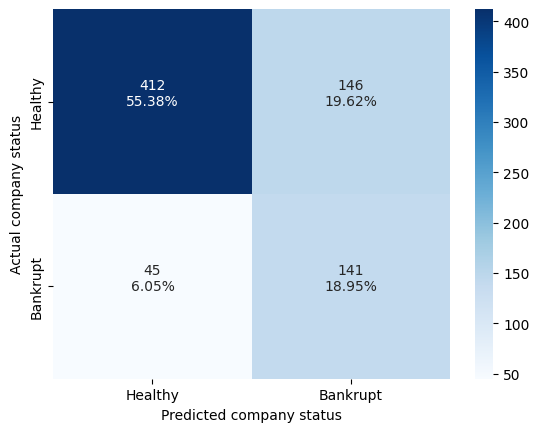

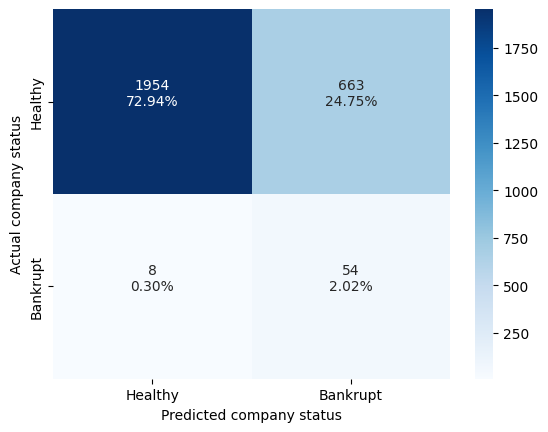

. Finished appending results to csv_data.
. Working with classifier RF...
. Finished training in 0.4481 seconds.
Train Metrics for RF:
TP: 186
TN: 558
FP: 0
FN: 0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC: 1.0
Test Metrics for RF:
TP: 32
TN: 2478
FP: 139
FN: 30
Accuracy: 0.94
Precision: 0.99
Recall: 0.95
F1 Score: 0.97
ROC-AUC: 0.89


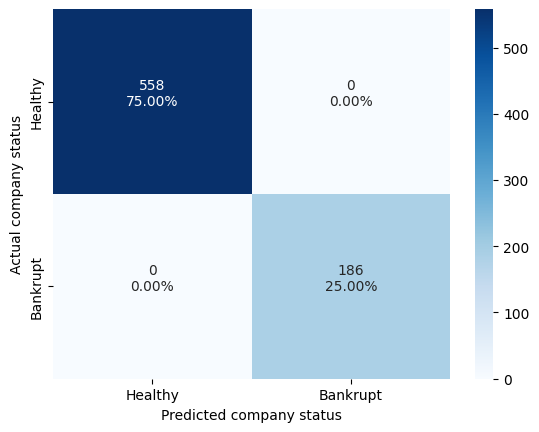

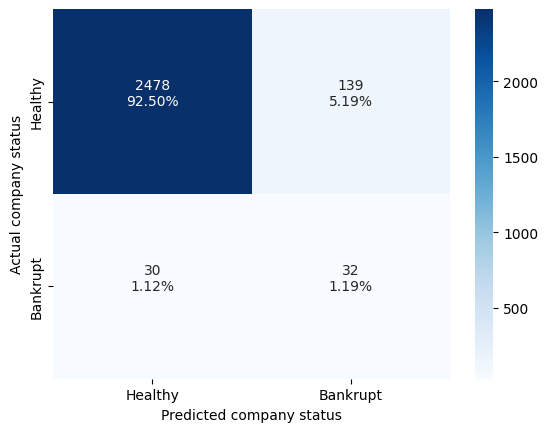

. Finished appending results to csv_data.
. Working with classifier kNN...
. Finished training in 0.0030 seconds.
Train Metrics for kNN:
TP: 105
TN: 520
FP: 38
FN: 81
Accuracy: 0.84
Precision: 0.87
Recall: 0.93
F1 Score: 0.9
ROC-AUC: 0.91
Test Metrics for kNN:
TP: 25
TN: 2335
FP: 282
FN: 37
Accuracy: 0.88
Precision: 0.98
Recall: 0.89
F1 Score: 0.94
ROC-AUC: 0.82


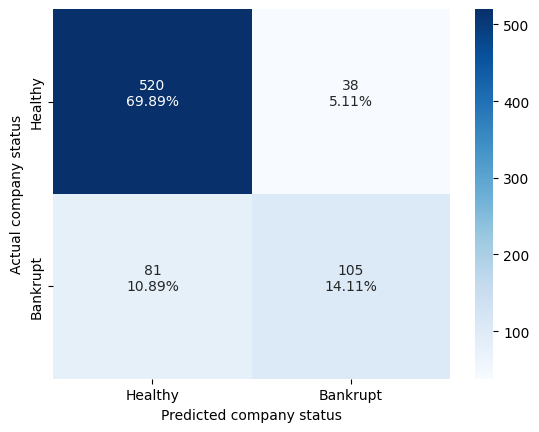

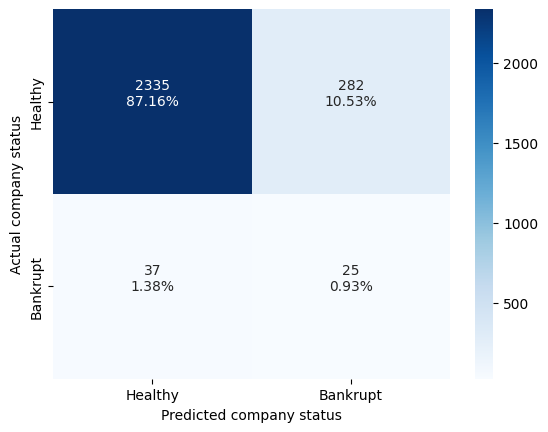

. Finished appending results to csv_data.
. Working with classifier NB...
. Finished training in 0.0049 seconds.
Train Metrics for NB:
TP: 100
TN: 492
FP: 66
FN: 86
Accuracy: 0.8
Precision: 0.85
Recall: 0.88
F1 Score: 0.87
ROC-AUC: 0.83
Test Metrics for NB:
TP: 43
TN: 2270
FP: 347
FN: 19
Accuracy: 0.86
Precision: 0.99
Recall: 0.87
F1 Score: 0.93
ROC-AUC: 0.84


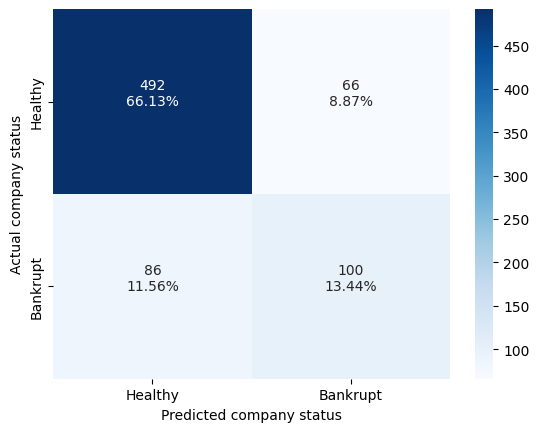

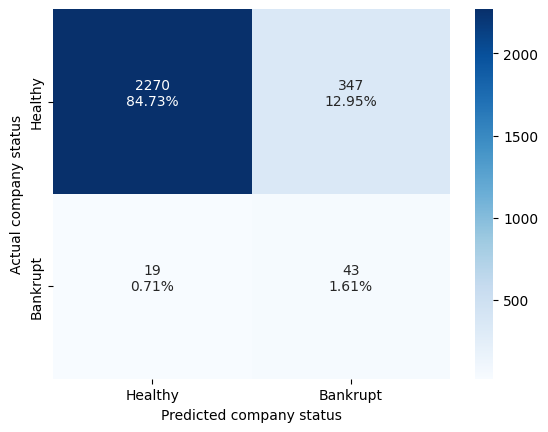

. Finished appending results to csv_data.
. Working with classifier MLP...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


. Finished training in 0.8118 seconds.
Train Metrics for MLP:
TP: 89
TN: 519
FP: 39
FN: 97
Accuracy: 0.82
Precision: 0.84
Recall: 0.93
F1 Score: 0.88
ROC-AUC: 0.87
Test Metrics for MLP:
TP: 38
TN: 2389
FP: 228
FN: 24
Accuracy: 0.91
Precision: 0.99
Recall: 0.91
F1 Score: 0.95
ROC-AUC: 0.87


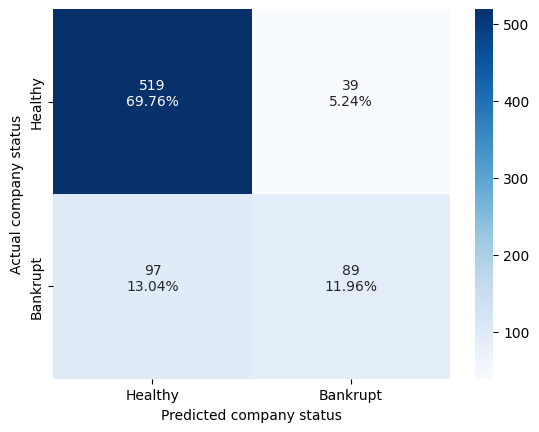

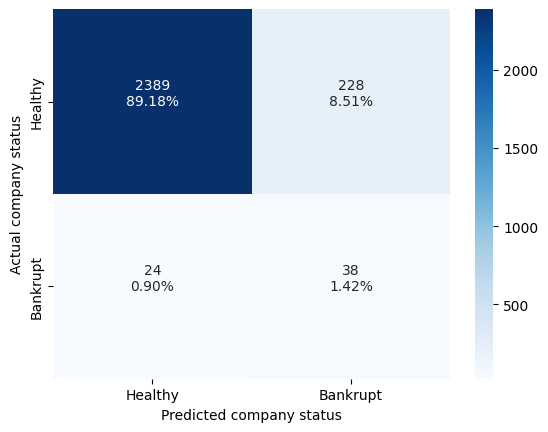

. Finished appending results to csv_data.
Currently in fold 3...
. Working with classifier SVM...
. Finished training in 0.1020 seconds.
Train Metrics for SVM:
TP: 154
TN: 441
FP: 117
FN: 32
Accuracy: 0.8
Precision: 0.93
Recall: 0.79
F1 Score: 0.86
ROC-AUC: 0.89
Test Metrics for SVM:
TP: 40
TN: 2081
FP: 536
FN: 22
Accuracy: 0.79
Precision: 0.99
Recall: 0.8
F1 Score: 0.88
ROC-AUC: 0.81


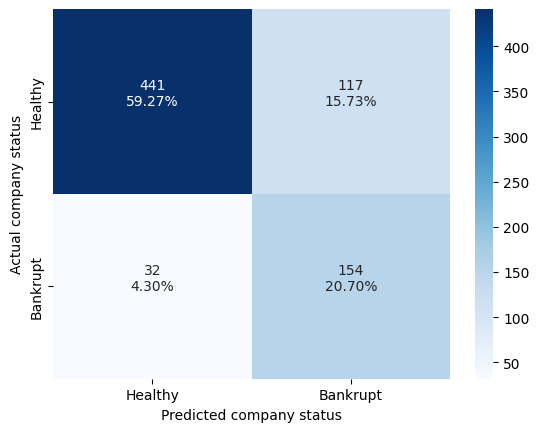

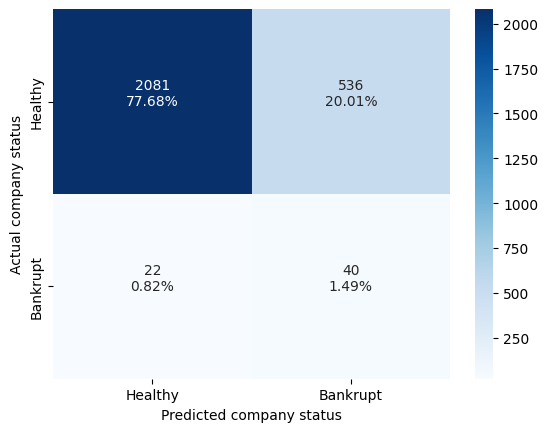

. Finished appending results to csv_data.
. Working with classifier Ctree...
. Finished training in 0.0099 seconds.
Train Metrics for Ctree:
TP: 186
TN: 558
FP: 0
FN: 0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC: 1.0
Test Metrics for Ctree:
TP: 25
TN: 2238
FP: 379
FN: 37
Accuracy: 0.84
Precision: 0.98
Recall: 0.86
F1 Score: 0.91
ROC-AUC: 0.63


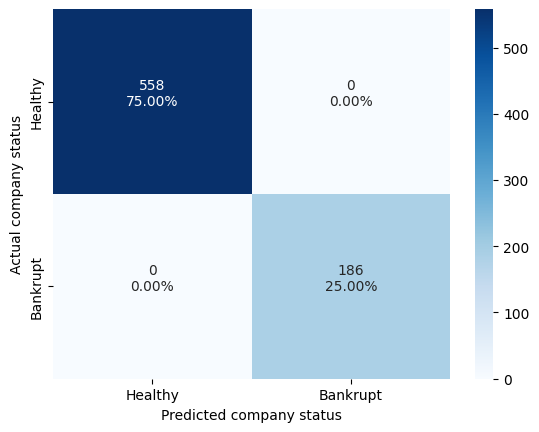

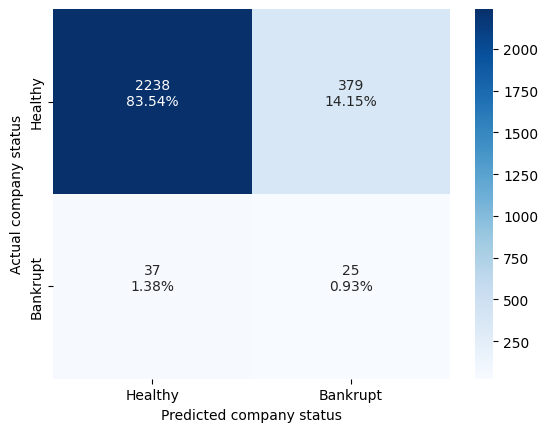

. Finished appending results to csv_data.
. Working with classifier LDA...
. Finished training in 0.0043 seconds.
Train Metrics for LDA:
TP: 81
TN: 518
FP: 40
FN: 105
Accuracy: 0.81
Precision: 0.83
Recall: 0.93
F1 Score: 0.88
ROC-AUC: 0.85
Test Metrics for LDA:
TP: 19
TN: 2435
FP: 182
FN: 43
Accuracy: 0.92
Precision: 0.98
Recall: 0.93
F1 Score: 0.96
ROC-AUC: 0.8


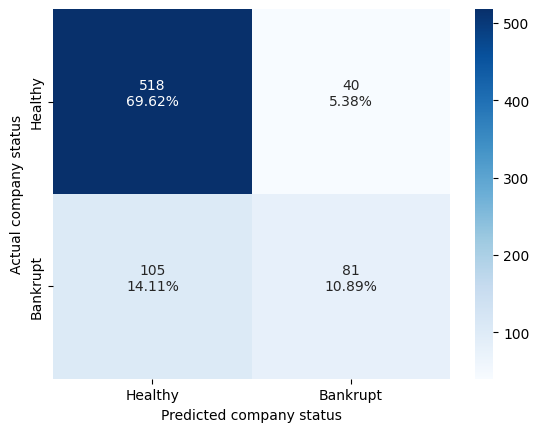

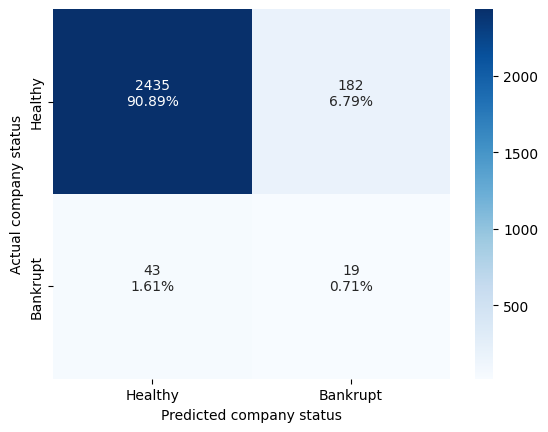

. Finished appending results to csv_data.
. Working with classifier LR...
. Finished training in 0.0128 seconds.
Train Metrics for LR:
TP: 148
TN: 436
FP: 122
FN: 38
Accuracy: 0.78
Precision: 0.92
Recall: 0.78
F1 Score: 0.84
ROC-AUC: 0.85
Test Metrics for LR:
TP: 38
TN: 2056
FP: 561
FN: 24
Accuracy: 0.78
Precision: 0.99
Recall: 0.79
F1 Score: 0.88
ROC-AUC: 0.8


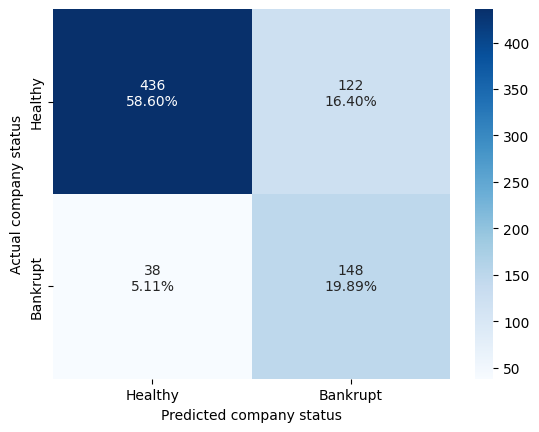

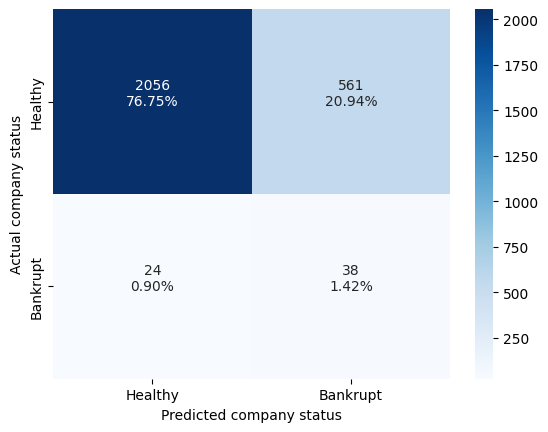

. Finished appending results to csv_data.
. Working with classifier RF...
. Finished training in 0.3036 seconds.
Train Metrics for RF:
TP: 186
TN: 558
FP: 0
FN: 0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC: 1.0
Test Metrics for RF:
TP: 23
TN: 2462
FP: 155
FN: 39
Accuracy: 0.93
Precision: 0.98
Recall: 0.94
F1 Score: 0.96
ROC-AUC: 0.81


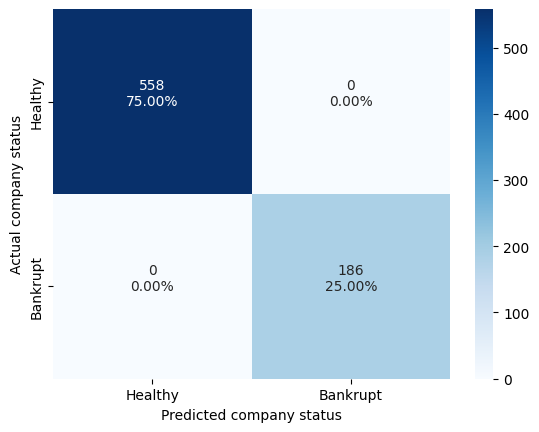

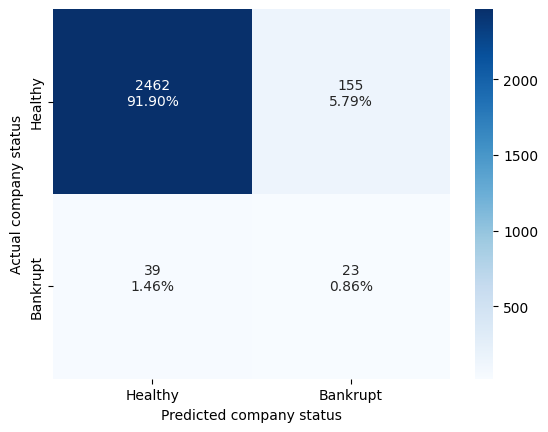

. Finished appending results to csv_data.
. Working with classifier kNN...
. Finished training in 0.0028 seconds.
Train Metrics for kNN:
TP: 116
TN: 516
FP: 42
FN: 70
Accuracy: 0.85
Precision: 0.88
Recall: 0.92
F1 Score: 0.9
ROC-AUC: 0.91
Test Metrics for kNN:
TP: 24
TN: 2399
FP: 218
FN: 38
Accuracy: 0.9
Precision: 0.98
Recall: 0.92
F1 Score: 0.95
ROC-AUC: 0.76


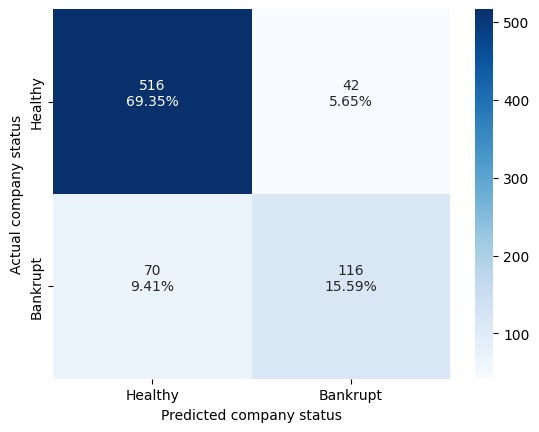

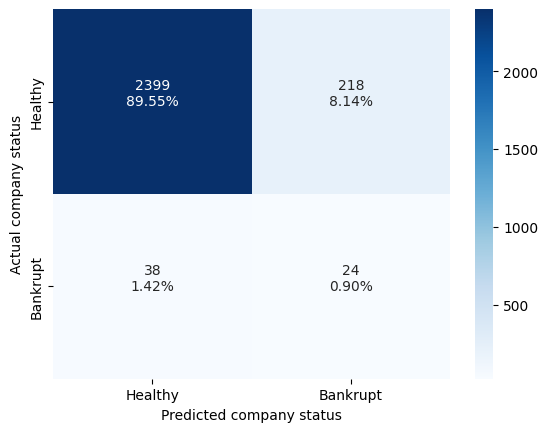

. Finished appending results to csv_data.
. Working with classifier NB...
. Finished training in 0.0021 seconds.
Train Metrics for NB:
TP: 92
TN: 481
FP: 77
FN: 94
Accuracy: 0.77
Precision: 0.84
Recall: 0.86
F1 Score: 0.85
ROC-AUC: 0.83
Test Metrics for NB:
TP: 21
TN: 2289
FP: 328
FN: 41
Accuracy: 0.86
Precision: 0.98
Recall: 0.87
F1 Score: 0.93
ROC-AUC: 0.77


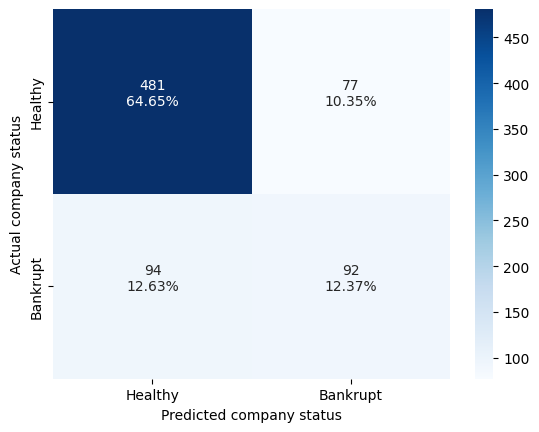

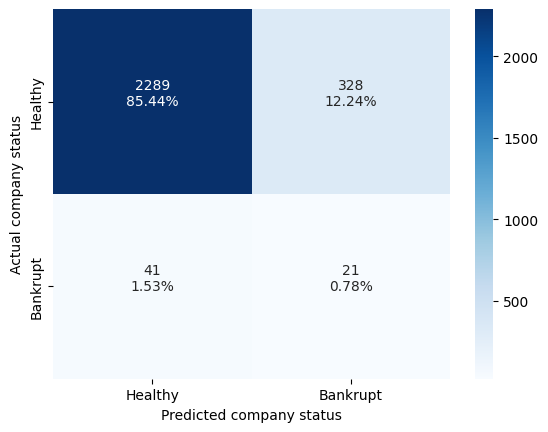

. Finished appending results to csv_data.
. Working with classifier MLP...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


. Finished training in 0.8790 seconds.
Train Metrics for MLP:
TP: 104
TN: 520
FP: 38
FN: 82
Accuracy: 0.84
Precision: 0.86
Recall: 0.93
F1 Score: 0.9
ROC-AUC: 0.88
Test Metrics for MLP:
TP: 23
TN: 2395
FP: 222
FN: 39
Accuracy: 0.9
Precision: 0.98
Recall: 0.92
F1 Score: 0.95
ROC-AUC: 0.81


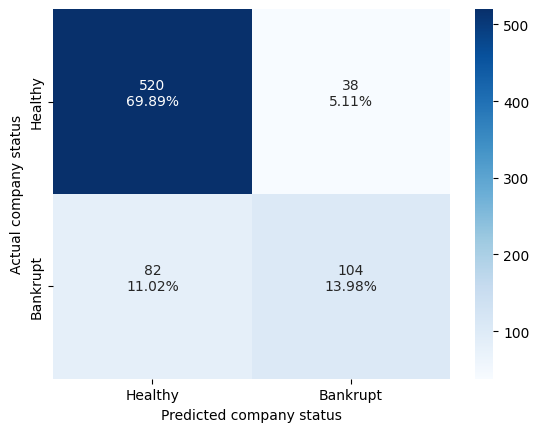

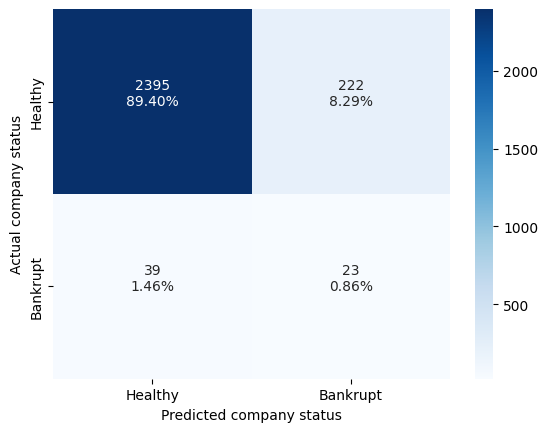

. Finished appending results to csv_data.
Currently in fold 4...
. Working with classifier SVM...
. Finished training in 0.1897 seconds.
Train Metrics for SVM:
TP: 152
TN: 456
FP: 102
FN: 34
Accuracy: 0.82
Precision: 0.93
Recall: 0.82
F1 Score: 0.87
ROC-AUC: 0.91
Test Metrics for SVM:
TP: 47
TN: 2040
FP: 577
FN: 15
Accuracy: 0.78
Precision: 0.99
Recall: 0.78
F1 Score: 0.87
ROC-AUC: 0.84


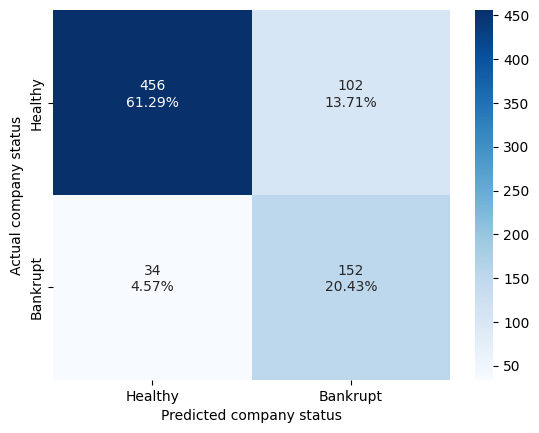

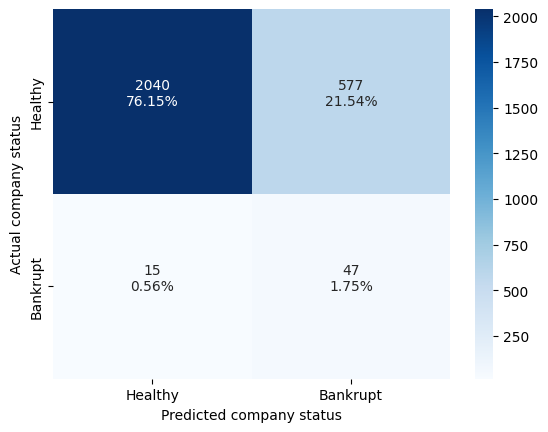

. Finished appending results to csv_data.
. Working with classifier Ctree...
. Finished training in 0.0121 seconds.
Train Metrics for Ctree:
TP: 186
TN: 558
FP: 0
FN: 0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC: 1.0
Test Metrics for Ctree:
TP: 28
TN: 2190
FP: 427
FN: 34
Accuracy: 0.83
Precision: 0.98
Recall: 0.84
F1 Score: 0.9
ROC-AUC: 0.64


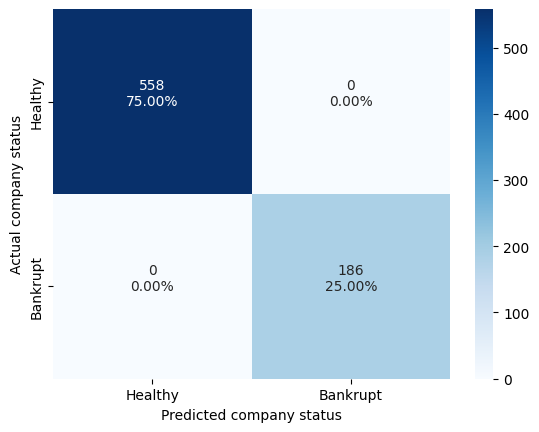

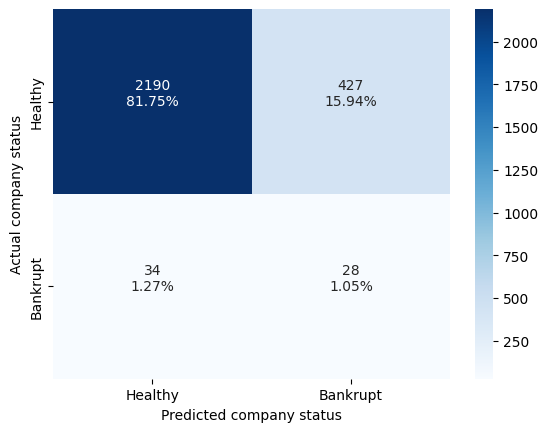

. Finished appending results to csv_data.
. Working with classifier LDA...
. Finished training in 0.0031 seconds.
Train Metrics for LDA:
TP: 77
TN: 528
FP: 30
FN: 109
Accuracy: 0.81
Precision: 0.83
Recall: 0.95
F1 Score: 0.88
ROC-AUC: 0.85
Test Metrics for LDA:
TP: 21
TN: 2422
FP: 195
FN: 41
Accuracy: 0.91
Precision: 0.98
Recall: 0.93
F1 Score: 0.95
ROC-AUC: 0.85


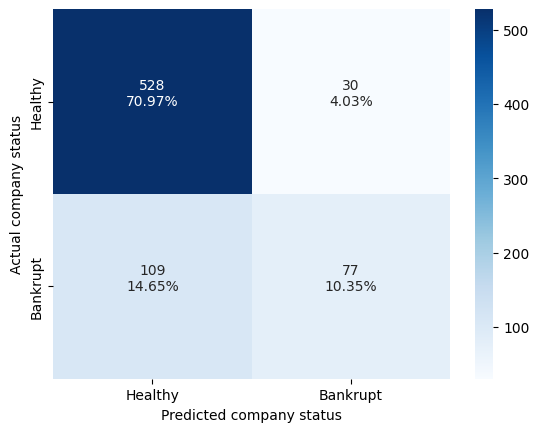

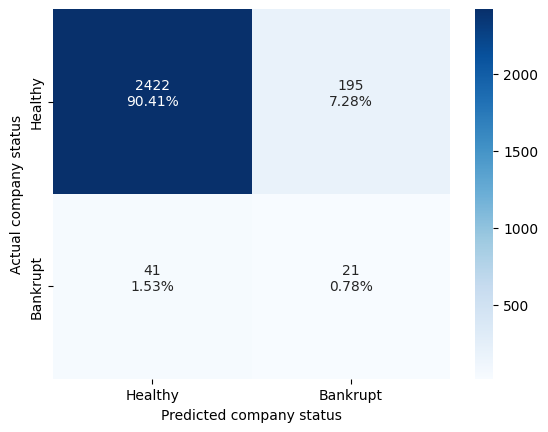

. Finished appending results to csv_data.
. Working with classifier LR...
. Finished training in 0.0123 seconds.
Train Metrics for LR:
TP: 140
TN: 433
FP: 125
FN: 46
Accuracy: 0.77
Precision: 0.9
Recall: 0.78
F1 Score: 0.84
ROC-AUC: 0.85
Test Metrics for LR:
TP: 52
TN: 2028
FP: 589
FN: 10
Accuracy: 0.78
Precision: 1.0
Recall: 0.77
F1 Score: 0.87
ROC-AUC: 0.85


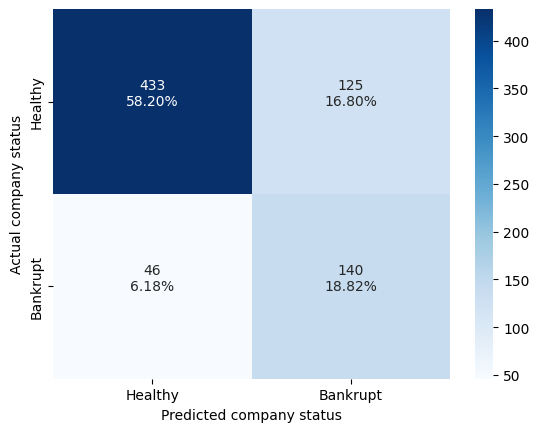

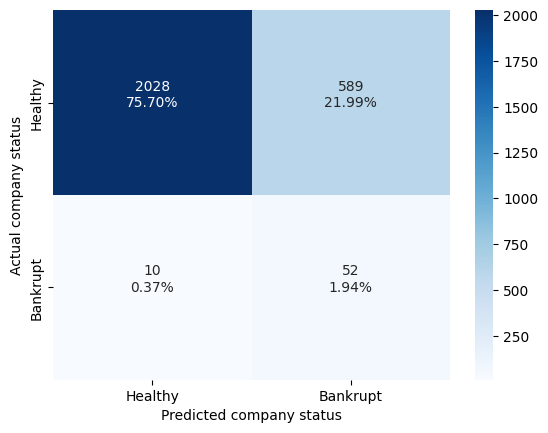

. Finished appending results to csv_data.
. Working with classifier RF...
. Finished training in 0.3022 seconds.
Train Metrics for RF:
TP: 186
TN: 558
FP: 0
FN: 0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC: 1.0
Test Metrics for RF:
TP: 29
TN: 2451
FP: 166
FN: 33
Accuracy: 0.93
Precision: 0.99
Recall: 0.94
F1 Score: 0.96
ROC-AUC: 0.87


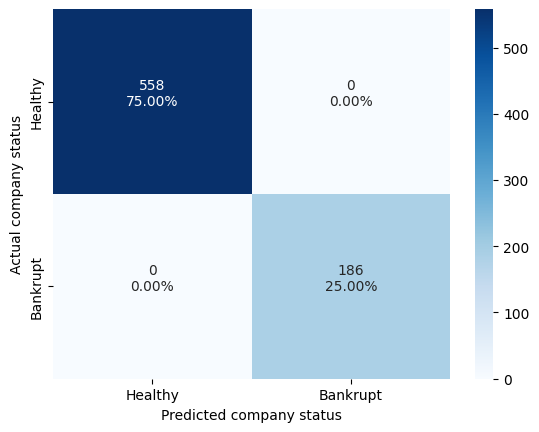

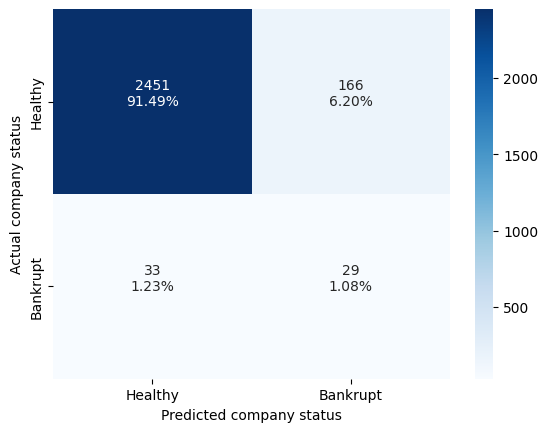

. Finished appending results to csv_data.
. Working with classifier kNN...
. Finished training in 0.0040 seconds.
Train Metrics for kNN:
TP: 115
TN: 526
FP: 32
FN: 71
Accuracy: 0.86
Precision: 0.88
Recall: 0.94
F1 Score: 0.91
ROC-AUC: 0.92
Test Metrics for kNN:
TP: 28
TN: 2349
FP: 268
FN: 34
Accuracy: 0.89
Precision: 0.99
Recall: 0.9
F1 Score: 0.94
ROC-AUC: 0.78


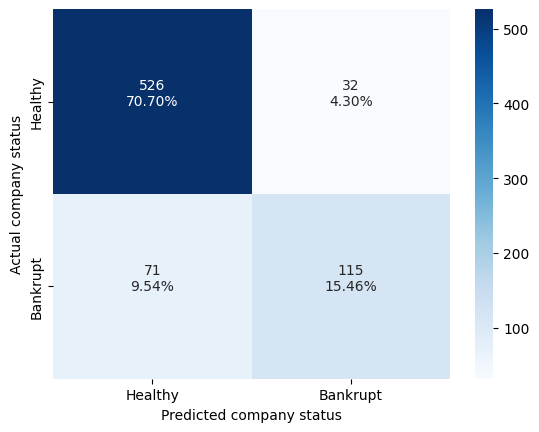

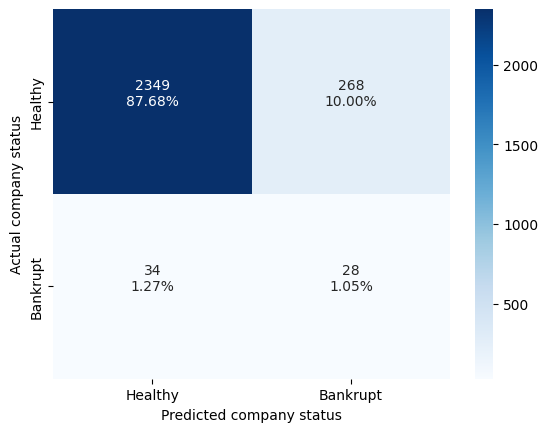

. Finished appending results to csv_data.
. Working with classifier NB...
. Finished training in 0.0035 seconds.
Train Metrics for NB:
TP: 99
TN: 498
FP: 60
FN: 87
Accuracy: 0.8
Precision: 0.85
Recall: 0.89
F1 Score: 0.87
ROC-AUC: 0.82
Test Metrics for NB:
TP: 31
TN: 2297
FP: 320
FN: 31
Accuracy: 0.87
Precision: 0.99
Recall: 0.88
F1 Score: 0.93
ROC-AUC: 0.84


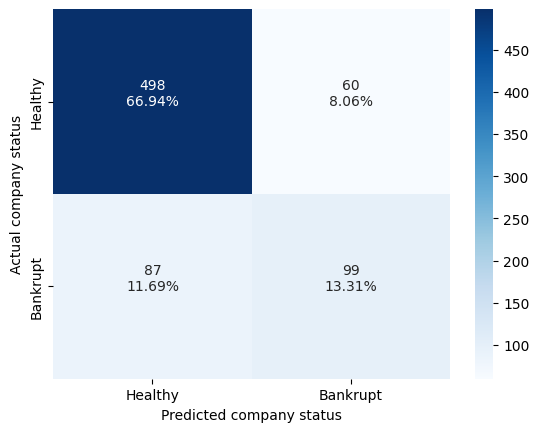

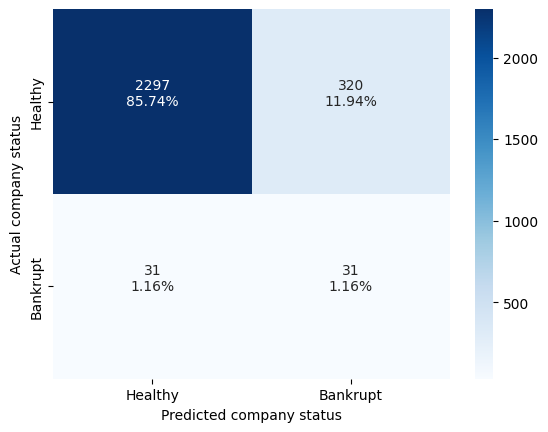

. Finished appending results to csv_data.
. Working with classifier MLP...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


. Finished training in 0.9560 seconds.
Train Metrics for MLP:
TP: 110
TN: 530
FP: 28
FN: 76
Accuracy: 0.86
Precision: 0.87
Recall: 0.95
F1 Score: 0.91
ROC-AUC: 0.89
Test Metrics for MLP:
TP: 34
TN: 2366
FP: 251
FN: 28
Accuracy: 0.9
Precision: 0.99
Recall: 0.9
F1 Score: 0.94
ROC-AUC: 0.85


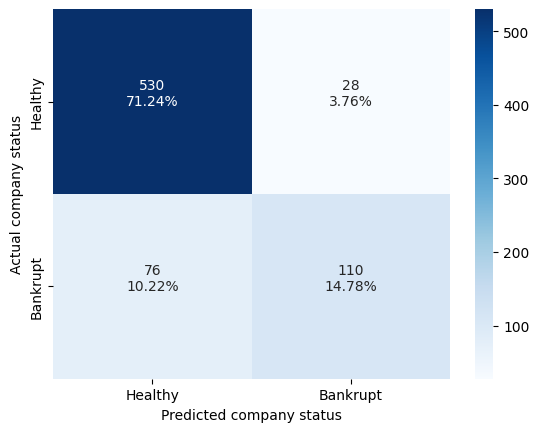

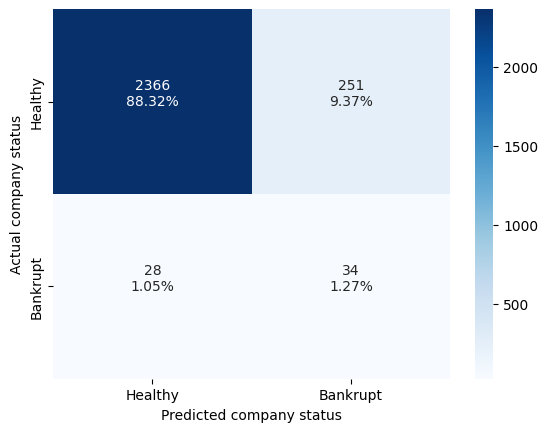

. Finished appending results to csv_data.
Results saved to balancedDataOutcomes.csv


In [39]:
# Updated training loop using the resampled data
foldCounter = 1
for resampled_fold in resampled_data:
    X_train_resampled, y_train_resampled, X_test, y_test = resampled_fold

    print(f'Currently in fold {foldCounter}...')

    # Train and evaluate models on the resampled data
    one_model_sim_function(
        "SVM",
        SVC(probability=True, class_weight='balanced'),
        X_train_resampled.values, y_train_resampled.values,
        X_test.values, y_test.values,
        figure_folder_path, "balanced"
    )
    one_model_sim_function(
        "Ctree",
        DecisionTreeClassifier(),
        X_train_resampled.values, y_train_resampled.values,
        X_test.values, y_test.values,
        figure_folder_path, "balanced"
    )
    one_model_sim_function(
        "LDA",
        LinearDiscriminantAnalysis(),
        X_train_resampled.values, y_train_resampled.values,
        X_test.values, y_test.values,
        figure_folder_path, "balanced"
    )
    one_model_sim_function(
        "LR",
        LogisticRegression(class_weight='balanced'),
        X_train_resampled.values, y_train_resampled.values,
        X_test.values, y_test.values,
        figure_folder_path, "balanced"
    )
    one_model_sim_function(
        "RF",
        RandomForestClassifier(class_weight='balanced'),
        X_train_resampled.values, y_train_resampled.values,
        X_test.values, y_test.values,
        figure_folder_path, "balanced"
    )
    one_model_sim_function(
        "kNN",
        KNeighborsClassifier(),
        X_train_resampled.values, y_train_resampled.values,
        X_test.values, y_test.values,
        figure_folder_path, "balanced"
    )
    one_model_sim_function(
        "NB",
        GaussianNB(),
        X_train_resampled.values, y_train_resampled.values,
        X_test.values, y_test.values,
        figure_folder_path, "balanced"
    )
    one_model_sim_function(
        "MLP",
        MLPClassifier(),
        X_train_resampled.values, y_train_resampled.values,
        X_test.values, y_test.values,
        figure_folder_path, "balanced"
    )

    foldCounter += 1

# Save results to CSV
results_df = pd.DataFrame(csv_data, columns=[
    "Model", "Set", "Balanced or unbalanced train set", "Number of training samples", "Bankrupt companies in training",
    "TP", "FP", "TN", "FN", "ROC-AUC"
])
results_df.to_csv("balancedDataOutcomes.csv", index=False)
print("Results saved to balancedDataOutcomes.csv")


In [42]:
# Αποθήκευση δεδομένων στο drive
csv_filename = "balancedDataOutcomes.csv"
csv_path = os.path.join(drive_path, csv_filename)

with open(csv_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(csv_data)